In [1]:
import pandas as pd
from pandas import DataFrame
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import feather data and pkl data to check they are same

Check data in both files are same.


In [2]:
attribution_path_data: DataFrame = pd.read_feather(
    "data/raw/attribution_path_data.feather"
)

attribution_path_data.reset_index(drop=True, inplace=True)

attribution_path_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457561 entries, 0 to 1457560
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   path_id              1457561 non-null  object
 1   device_type          1457561 non-null  int64 
 2   attribution_channel  1457561 non-null  int64 
 3   distance_to_last     1457561 non-null  int64 
 4   time_delta_in_days   1457561 non-null  int64 
 5   has_booked           1457561 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 66.7+ MB


In [3]:
attribution_path_data.head(5)

,path_id,device_type,attribution_channel,distance_to_last,time_delta_in_days,has_booked
0,4c56d801d41290b7b204b55e1565689f,2,1,1,0,1
1,f67f11542569fa3372214a8b8231e8f8,3,1,1,0,0
2,4b36abed039d194e68fe35ea6ec16582,3,1,1,0,0
3,5a2b4ed0e7724a37ce6da8c43694d7b5,3,1,1,0,0
4,0eac2290c521210fb3f98cdff734e7f7,3,1,1,0,0


In [4]:
attribution_path_pkl_df = pd.read_pickle("data/raw/attribution_path_data.pkl")
attribution_path_pkl_df.reset_index(drop=True, inplace=True)
attribution_path_pkl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457561 entries, 0 to 1457560
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   path_id              1457561 non-null  object
 1   device_type          1457561 non-null  int64 
 2   attribution_channel  1457561 non-null  int64 
 3   distance_to_last     1457561 non-null  int64 
 4   time_delta_in_days   1457561 non-null  int64 
 5   has_booked           1457561 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 66.7+ MB


In [5]:
attribution_path_pkl_df.head(5)

,path_id,device_type,attribution_channel,distance_to_last,time_delta_in_days,has_booked
0,4c56d801d41290b7b204b55e1565689f,2,1,1,0,1
1,f67f11542569fa3372214a8b8231e8f8,3,1,1,0,0
2,4b36abed039d194e68fe35ea6ec16582,3,1,1,0,0
3,5a2b4ed0e7724a37ce6da8c43694d7b5,3,1,1,0,0
4,0eac2290c521210fb3f98cdff734e7f7,3,1,1,0,0


In [6]:
are_equal: bool = attribution_path_data.equals(attribution_path_pkl_df)

if are_equal:
    print("Both DataFrames are equal.")
else:
    print("DataFrames are not equal.")

Both DataFrames are equal.


#### Conclusion: Both feather and pkl data are same so will be using only feather data.


In [7]:
user_feature_data: DataFrame = pd.read_feather("data/raw/user_feature_data.feather")

user_feature_data.reset_index(drop=True, inplace=True)

user_feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228858 entries, 0 to 228857
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   path_id                   228858 non-null  object 
 1   n_sessions                228858 non-null  int64  
 2   most_common_landing_page  228858 non-null  object 
 3   clicked_city              118982 non-null  object 
 4   viewed_city               157419 non-null  object 
 5   viewed_beach              157419 non-null  object 
 6   saw_brand                 228460 non-null  object 
 7   saw_organic               228460 non-null  object 
 8   saw_direct                228460 non-null  object 
 9   saw_offer_summary         228858 non-null  bool   
 10  saw_panda                 228858 non-null  bool   
 11  adults                    228858 non-null  float64
 12  children                  228858 non-null  float64
 13  nights                    228858 non-null  f

In [8]:
user_feature_data.head(5)

,path_id,n_sessions,most_common_landing_page,clicked_city,viewed_city,viewed_beach,saw_brand,saw_organic,saw_direct,saw_offer_summary,saw_panda,adults,children,nights
0,2ae3158970d6044f06fb0a9b5564cc42,1,FAQ,None,None,None,False,False,True,False,False,0.0,0.0,0.0
1,fa6487d637ca997f950dcab63f358c91,2,FAQ,None,None,None,False,True,True,False,False,0.0,0.0,0.0
2,b744b3641e1de2f50259314e21fbcdf9,1,FAQ,None,None,None,False,False,True,False,False,0.0,0.0,0.0
3,35b3eb0a564f6803202fe12323609d37,5,FAQ,None,None,None,False,True,True,False,False,0.0,0.0,0.0
4,a5a3abce4217d87e8b3bb29f6846fee1,1,FAQ,None,None,None,False,False,True,False,False,0.0,0.0,0.0


### Check unique values in dataset

Prints the number of unique values and all the unique values


In [9]:
from src.main.util import get_unique_values

attribution_path_data_columns: List[str] = attribution_path_data.columns.to_list()

for column in attribution_path_data_columns:
    get_unique_values(attribution_path_data, column)

---------- path_id -----------
['4c56d801d41290b7b204b55e1565689f' 'f67f11542569fa3372214a8b8231e8f8'
 '4b36abed039d194e68fe35ea6ec16582' ... 'afc1a534b29ce430d5d80d5dfb5e5ed3'
 '8fe0784afd90fd682d62530b53c4713f' 'db330f0d1173f3b0496bae4c4ce87824']
Total unique values in column path_id: 238096 

---------- device_type -----------
[2 3 5 6]
Total unique values in column device_type: 4 

---------- attribution_channel -----------
[ 1  2  3  4  5  7  8  9  6 11 12 14 15 16 10 17 18 19 20 21 23 24 25 26
 27 28 29 31 32 33 35 37 38 39 40 30]
Total unique values in column attribution_channel: 36 

---------- distance_to_last -----------
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  30  31  32  35  36  37  38  39
  40  41  42  43  44  45  46  48  49  50  53  56  57  58  60  61  63  66
  73  76  90  91  93 106 109 141 142 149 151 158 181 208 214  29  33  34
  47  51  54  55  59  62  65  69  71  77  78  79  80  81  82  87 100 

In [10]:
user_feature_data_columns: List[str] = user_feature_data.columns.to_list()

for column in user_feature_data_columns:
    get_unique_values(user_feature_data, column)

---------- path_id -----------
['2ae3158970d6044f06fb0a9b5564cc42' 'fa6487d637ca997f950dcab63f358c91'
 'b744b3641e1de2f50259314e21fbcdf9' ... '605bd0ed9a31f096366121d279dd49db'
 'fb60ec80ececea6b6e5c40a16e6fda5f' 'b582c1838645758bebe7e72d4ba633f8']
Total unique values in column path_id: 228858 

---------- n_sessions -----------
[  1   2   5   3   8   9   7   4   6  12  11  16  15  10  19  28  25  14
  13  55  20  17  18  49  27  24 129  23 220  50  32  64  22  26  62  30
  42  46  38  39  34  56  80  40  48  73  36  71  43  57  33  29 108  54
  68  53  75  69  92  58 142  61  66 161  45 307  67  51  52  65  35  41
 117  77  70  44 127  21 130  37  72  76  85 156 119  83 194  87  59  60
 103 112  90 116 147  79 126 114  63 122  94  47 158 225  81 255 104  88
 106  99  84  91 109  31  95 171 159  98 191  78  86  74 118  89 125  93
  97  82 135 115  96 107 137 154 110 105 132 202 348 146 134 100 179 214
 128 174 133 301 124 151 120 224 152 102 138 121 136 155 198 111 139 196
 160 222 394

### Merge all datasets


In [11]:
from pandas import DataFrame
from src.main.preprocess_data import merge_data

merged_data: DataFrame = merge_data(
    "data/raw/attribution_path_data.feather", "data/raw/user_feature_data.feather"
)
merged_data.head(5)

,path_id,device_type,attribution_channel,distance_to_last,time_delta_in_days,has_booked,n_sessions,most_common_landing_page,clicked_city,viewed_city,viewed_beach,saw_brand,saw_organic,saw_direct,saw_offer_summary,saw_panda,adults,children,nights
0,4c56d801d41290b7b204b55e1565689f,2,1,1,0,1,6,Search,False,False,False,False,False,True,True,True,6.0,0.333333,0.666667
1,4c56d801d41290b7b204b55e1565689f,2,9,6,1,1,6,Search,False,False,False,False,False,True,True,True,6.0,0.333333,0.666667
2,4c56d801d41290b7b204b55e1565689f,2,9,4,0,1,6,Search,False,False,False,False,False,True,True,True,6.0,0.333333,0.666667
3,4c56d801d41290b7b204b55e1565689f,2,9,2,0,1,6,Search,False,False,False,False,False,True,True,True,6.0,0.333333,0.666667
4,4c56d801d41290b7b204b55e1565689f,2,9,7,1,1,6,Search,False,False,False,False,False,True,True,True,6.0,0.333333,0.666667


In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447561 entries, 0 to 1447560
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   path_id                   1447561 non-null  object 
 1   device_type               1447561 non-null  int64  
 2   attribution_channel       1447561 non-null  int64  
 3   distance_to_last          1447561 non-null  int64  
 4   time_delta_in_days        1447561 non-null  int64  
 5   has_booked                1447561 non-null  int64  
 6   n_sessions                1447561 non-null  int64  
 7   most_common_landing_page  1447561 non-null  object 
 8   clicked_city              1087089 non-null  object 
 9   viewed_city               1235487 non-null  object 
 10  viewed_beach              1235487 non-null  object 
 11  saw_brand                 1446543 non-null  object 
 12  saw_organic               1446543 non-null  object 
 13  saw_direct                1

In [13]:
# Group the data by path ID and aggregate the features
grouped_data: DataFrame = merged_data.groupby("path_id").agg(
    {
        "device_type": lambda x: x.mode().iloc[0],
        "attribution_channel": lambda x: x.mode().iloc[0],
        "distance_to_last": "max",
        "time_delta_in_days": "max",
        "has_booked": "max",
        "n_sessions": "max",
        "most_common_landing_page": lambda x: x.mode().iloc[0],
        "clicked_city": "max",
        "viewed_city": "max",
        "viewed_beach": "max",
        "saw_brand": "max",
        "saw_organic": "max",
        "saw_direct": "max",
        "saw_offer_summary": "max",
        "saw_panda": "max",
        "adults": "max",
        "children": "max",
        "nights": "max",
    }
)
grouped_data

,device_type,attribution_channel,distance_to_last,time_delta_in_days,has_booked,n_sessions,most_common_landing_page,clicked_city,viewed_city,viewed_beach,saw_brand,saw_organic,saw_direct,saw_offer_summary,saw_panda,adults,children,nights
path_id,,,,,,,,,,,,,,,,,,
00003d039958362817073f4c9448ff34,3,7,2,1,0,1,Search,False,False,False,False,False,False,False,True,6.0,0.0,1.0
00004fcd09bcf6bccb16269538032578,3,4,2,2,0,1,SEO,NaN,NaN,NaN,False,False,False,False,False,0.0,0.0,0.0
0000fc42234be9ec2abcbb4c71b4bae4,3,17,3,1,0,2,Homepage,False,False,False,True,False,False,True,True,1.0,0.0,1.0
000148e9e616d1a4f03c92f566f37b39,3,7,2,19,0,1,Hotel Details,NaN,False,False,False,False,False,False,True,2.0,0.0,1.0
00014d81cd6599192b2446c4c65a29c0,5,21,2,0,0,1,Hotel Details,NaN,False,False,False,False,False,False,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffeb83084cd63bf98f06a9831713ade,5,21,2,0,0,1,SEO,NaN,NaN,NaN,False,True,False,False,False,0.0,0.0,0.0
fffecfee29bb3142a438092ee6ffd638,2,2,4,4,1,3,Homepage,False,False,False,True,False,False,True,True,2.0,0.0,1.0
fffedd1c982de9688cc6bd78a8a8a399,3,9,2,0,0,1,SEO,False,NaN,NaN,False,False,False,False,False,0.0,0.0,0.0


# Exploratory Data Analysis


#### Distribution of Target Variables


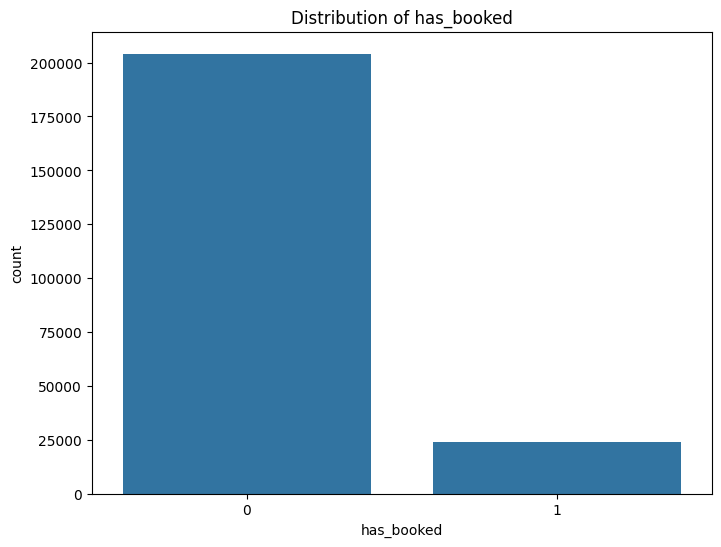

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="has_booked", data=grouped_data)
plt.title("Distribution of has_booked")
plt.show()

#### Distribution of Categorical Features with target values


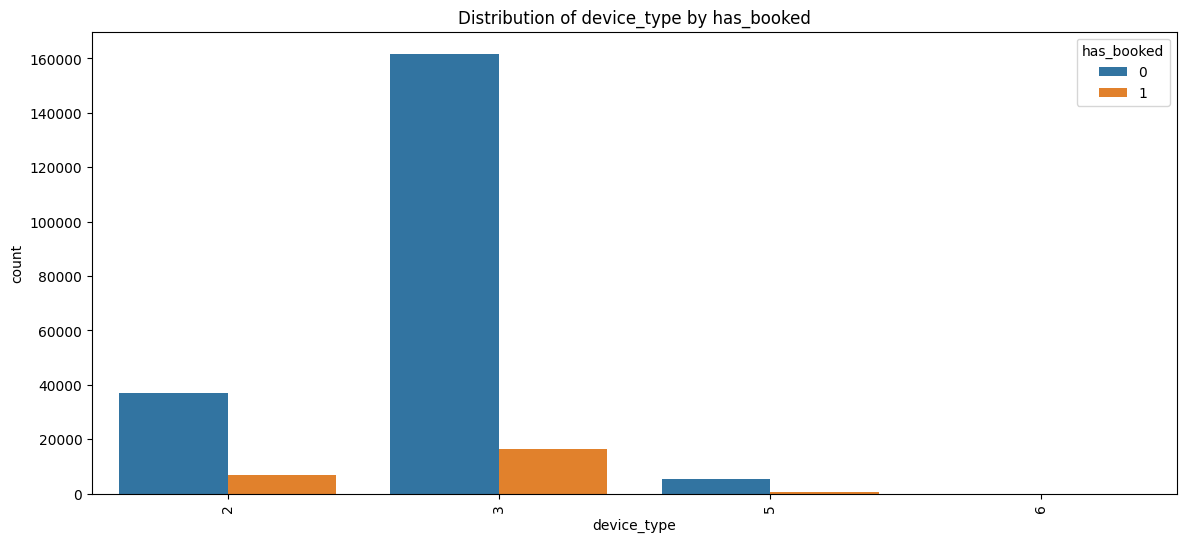

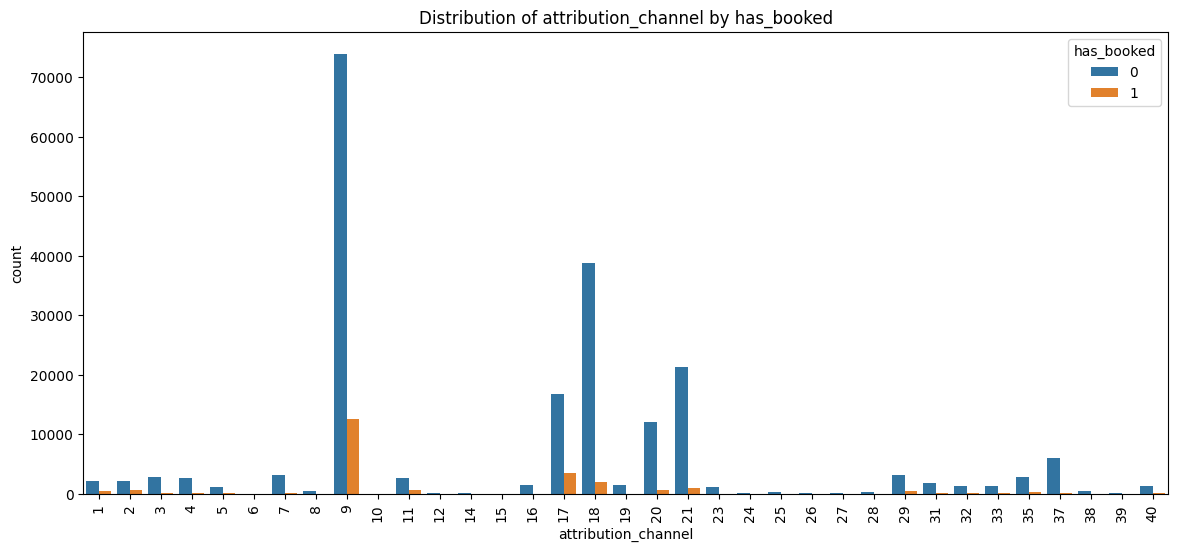

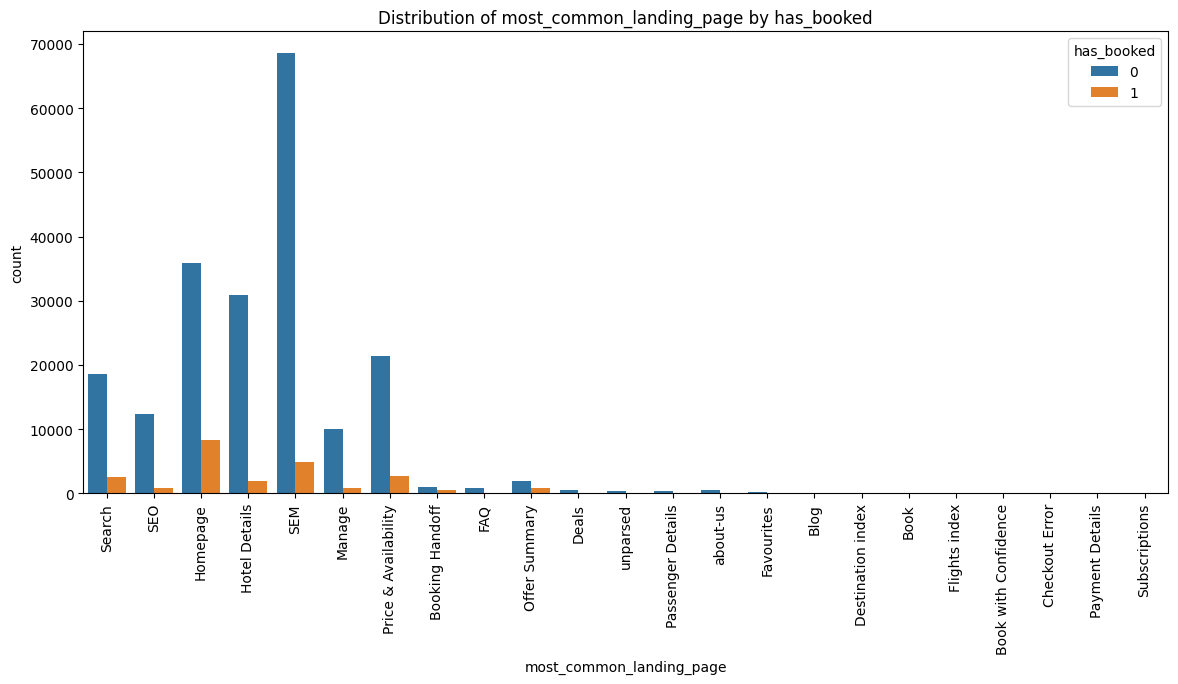

In [15]:
categorical_features = [
    "device_type",
    "attribution_channel",
    "most_common_landing_page",
]
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, hue="has_booked", data=grouped_data)
    plt.title(f"Distribution of {feature} by has_booked")
    plt.xticks(rotation=90)  # Set x-axis labels to vertical
    plt.show()

#### Data distribution of all Numerical variables


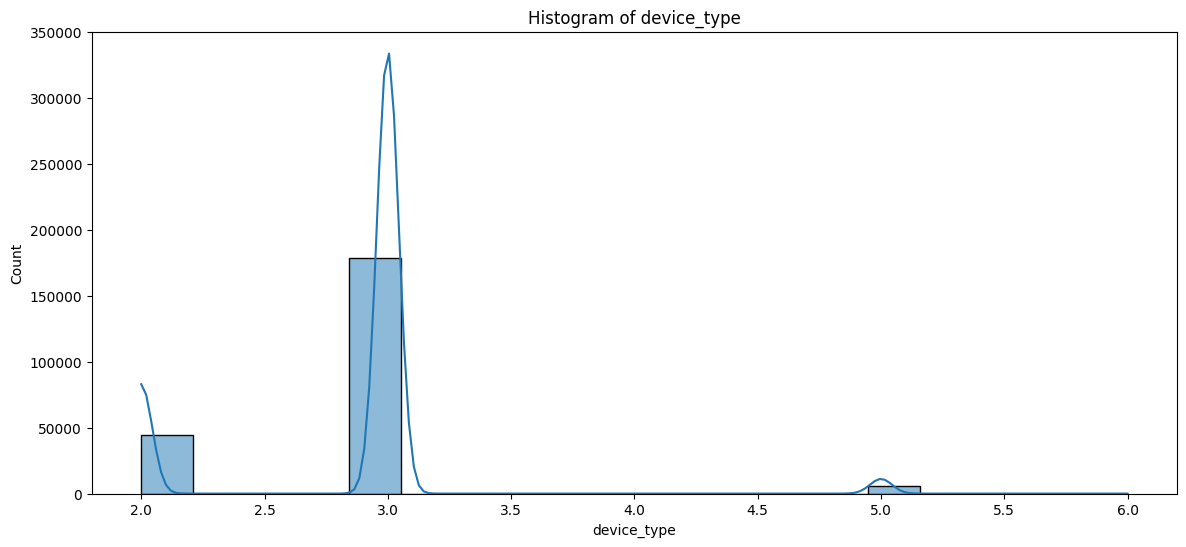

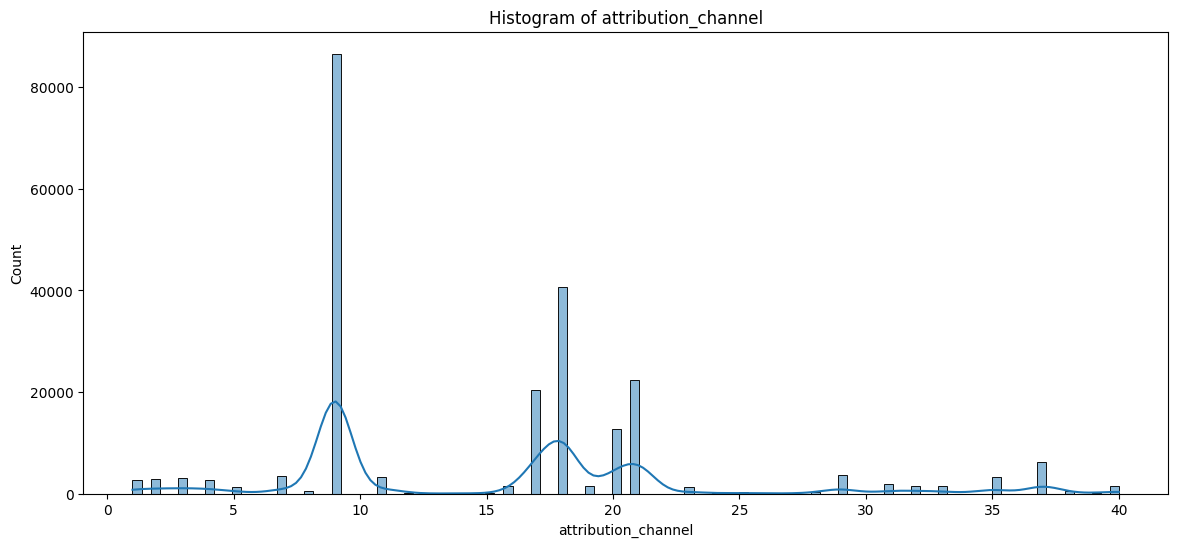

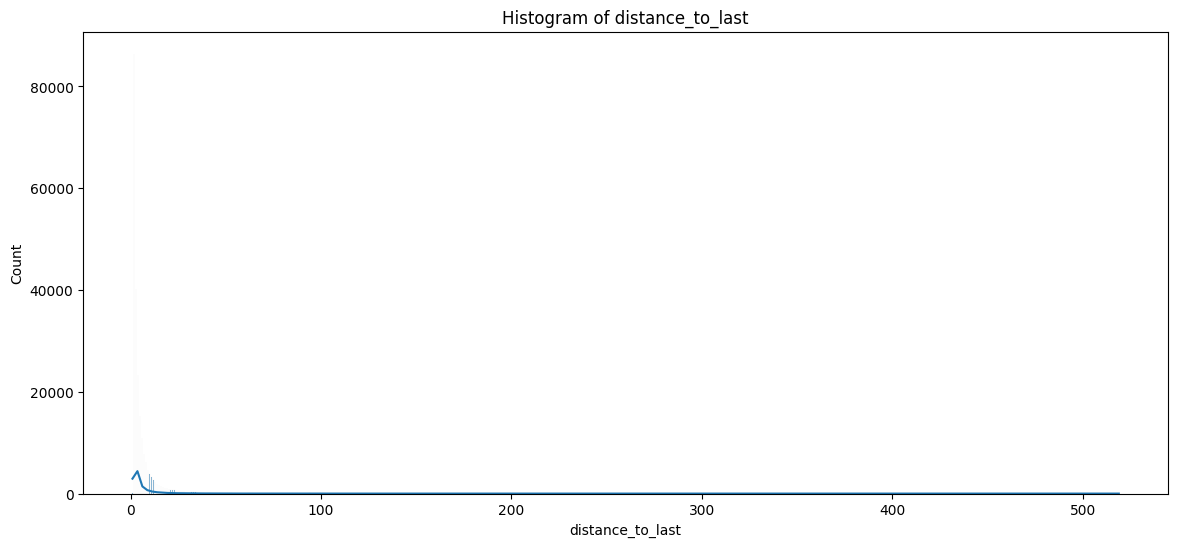

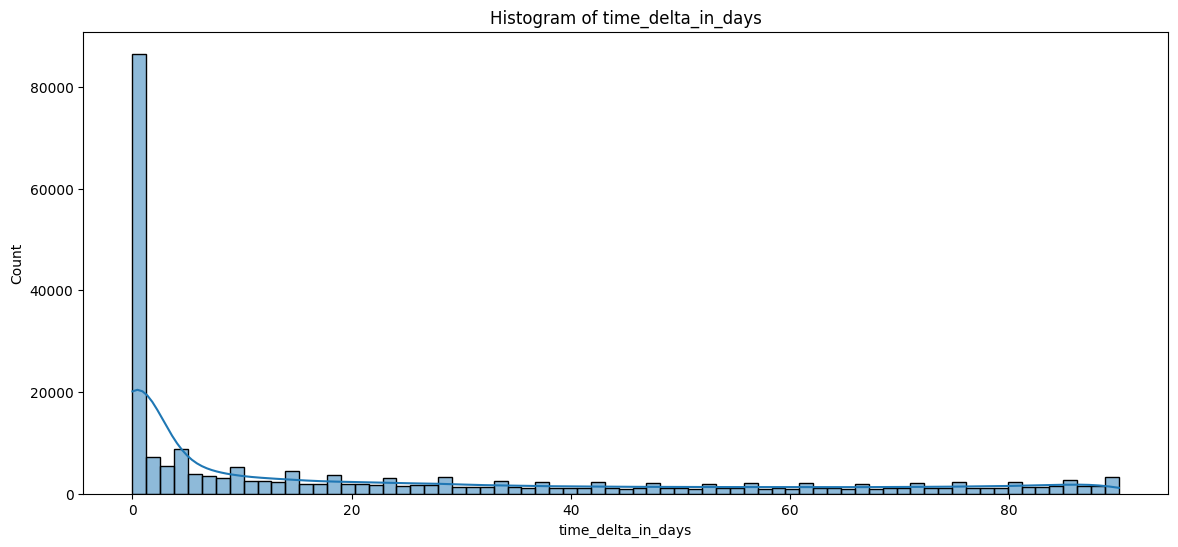

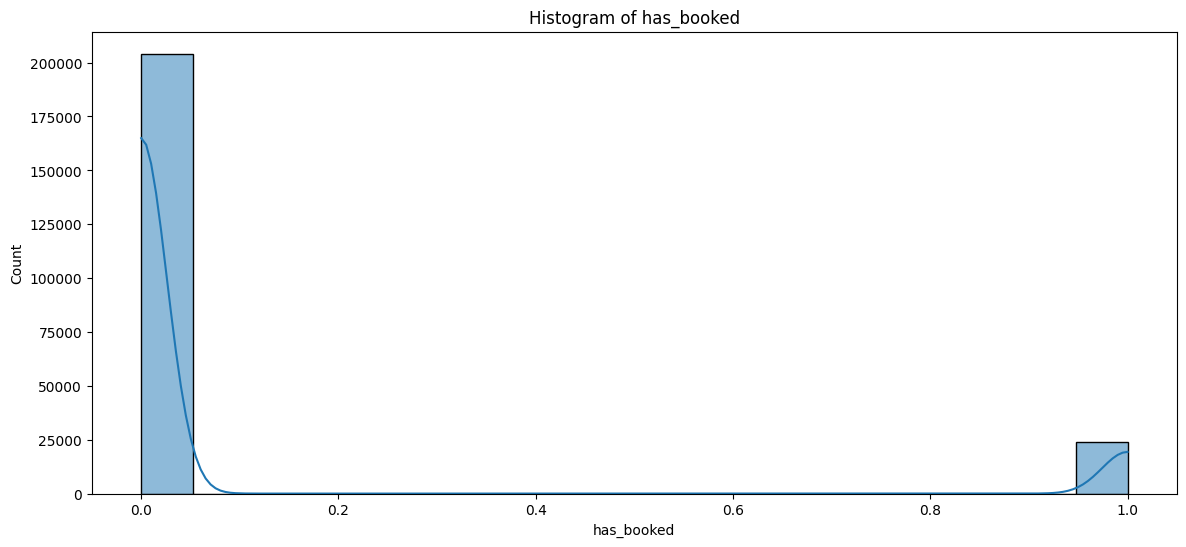

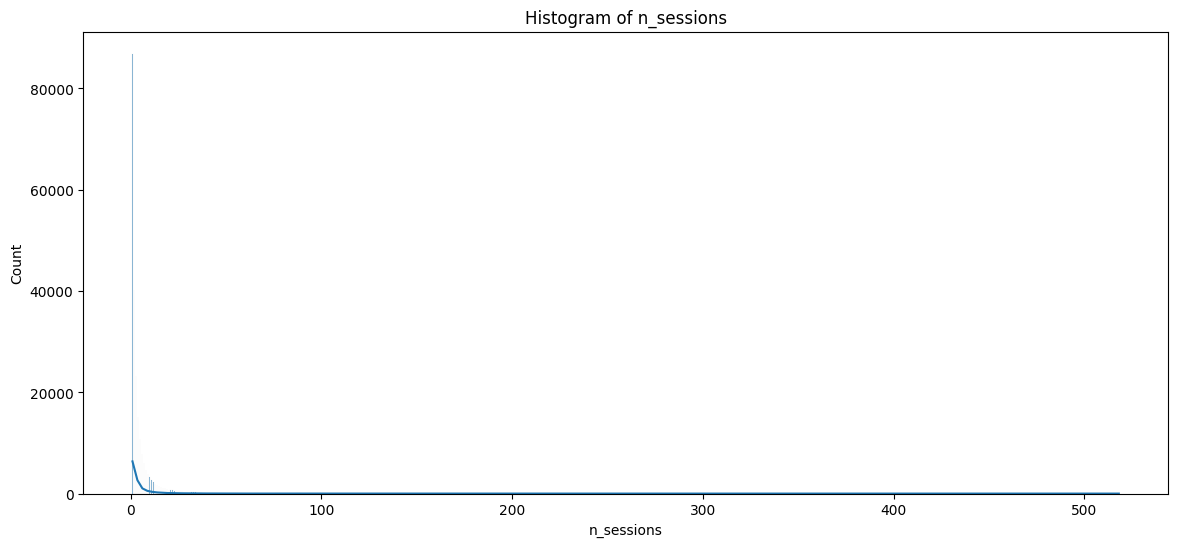

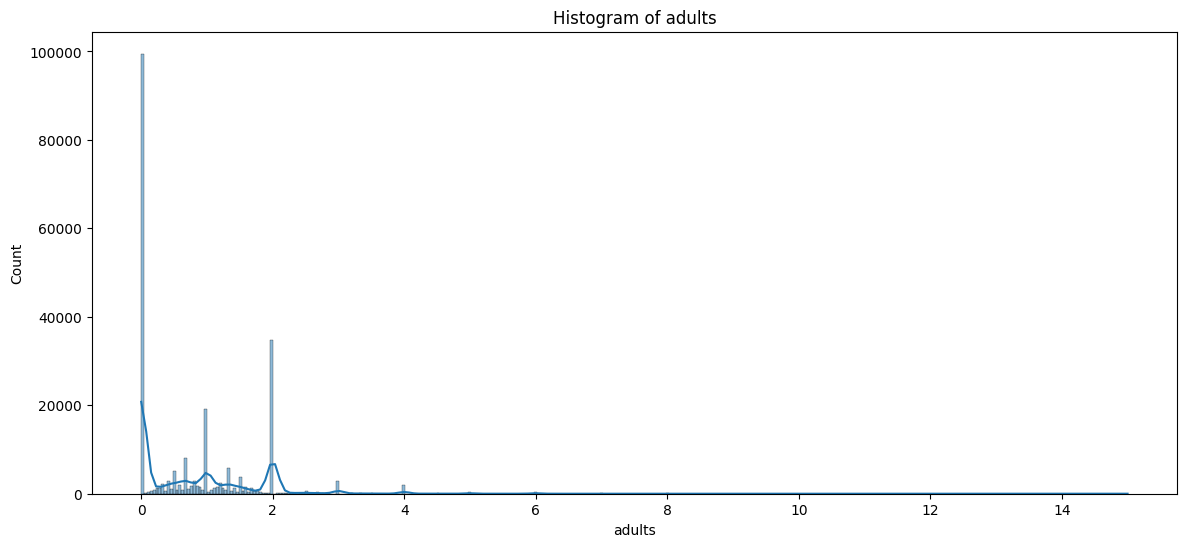

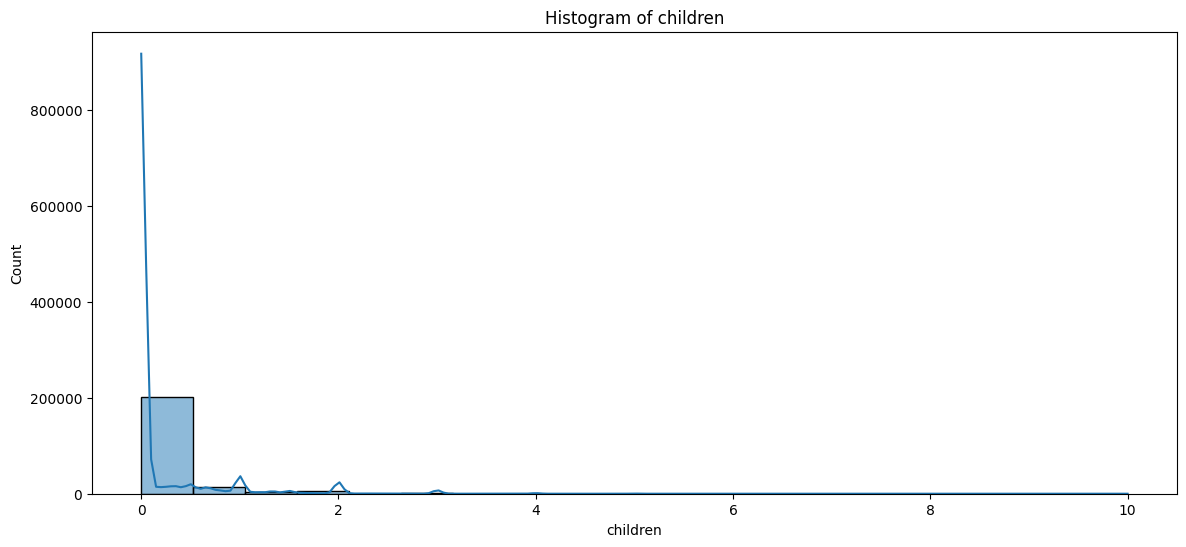

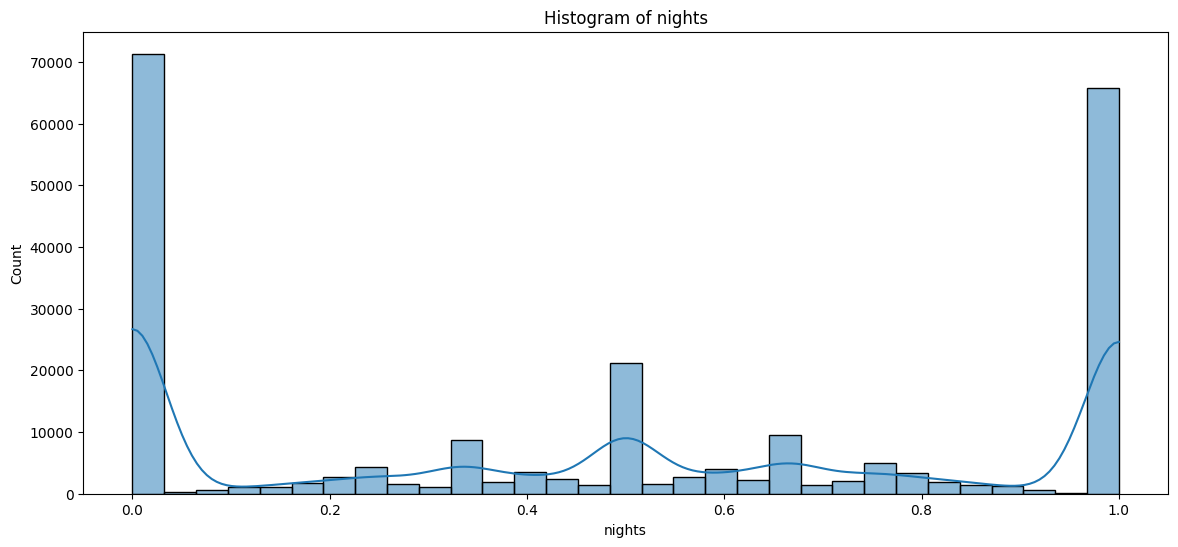

In [16]:
import numpy as np

for col in grouped_data.select_dtypes(include=[np.number]):
    plt.figure(figsize=(14, 6))
    sns.histplot(grouped_data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

#### Data distribution of all Categorical variables


In [17]:
# # Drop unnecessary columns
# columns_to_drop: List[str] = [
#     "path_id",
# ]
# print(f"Dropping unnecessary features: {columns_to_drop}")
# grouped_data: DataFrame = merged_data.drop(
#     columns_to_drop,
#     axis=1,
# )

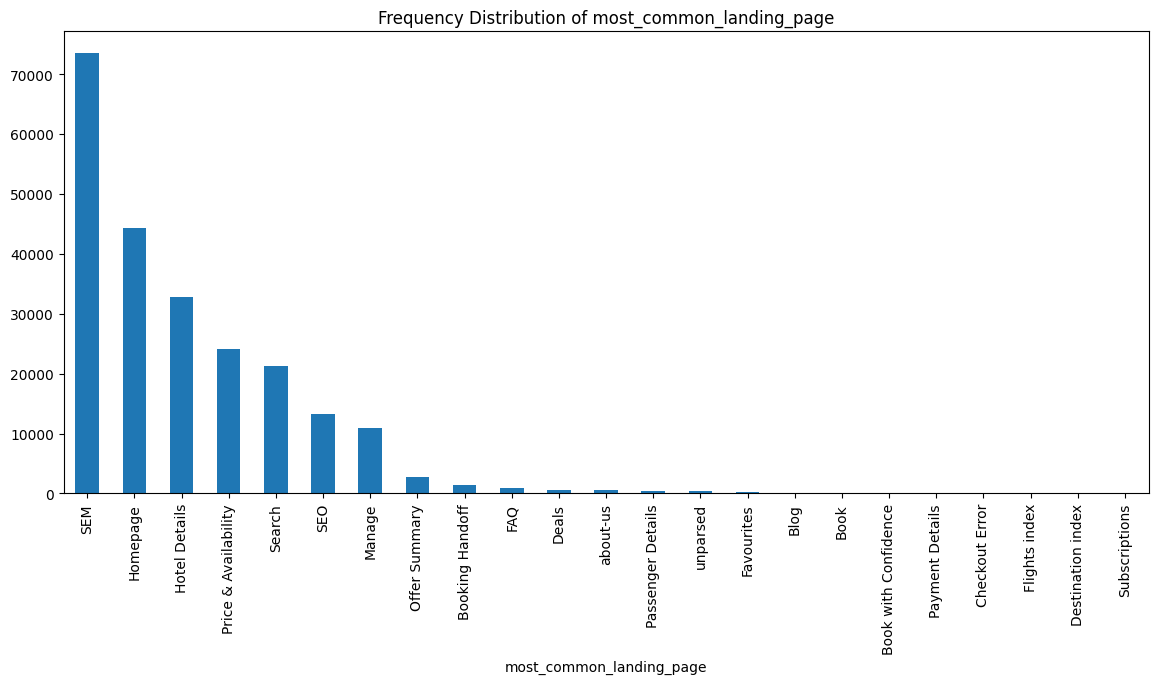

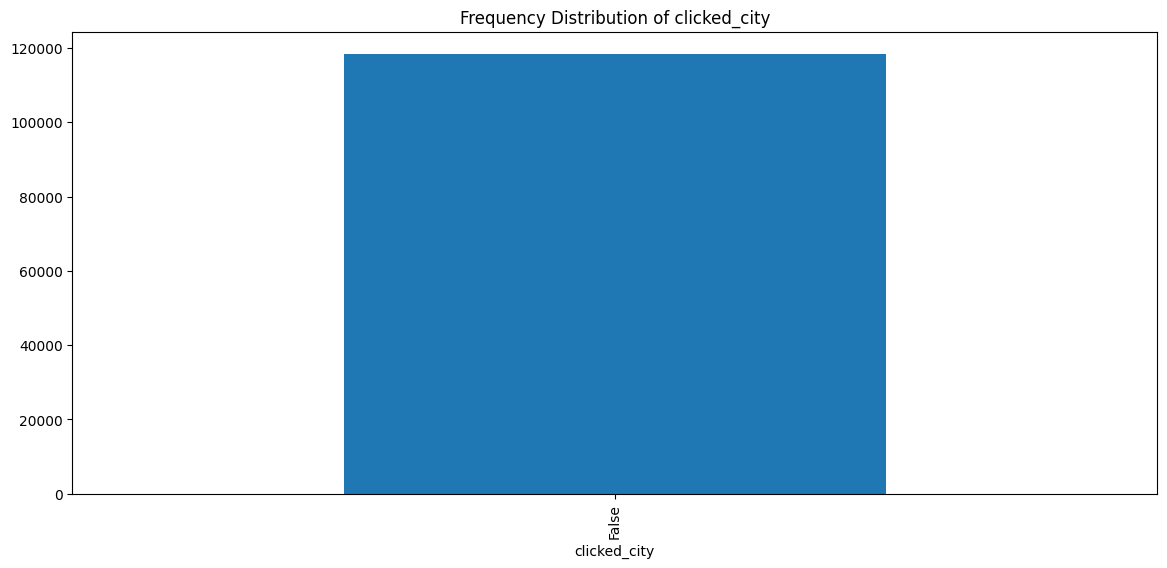

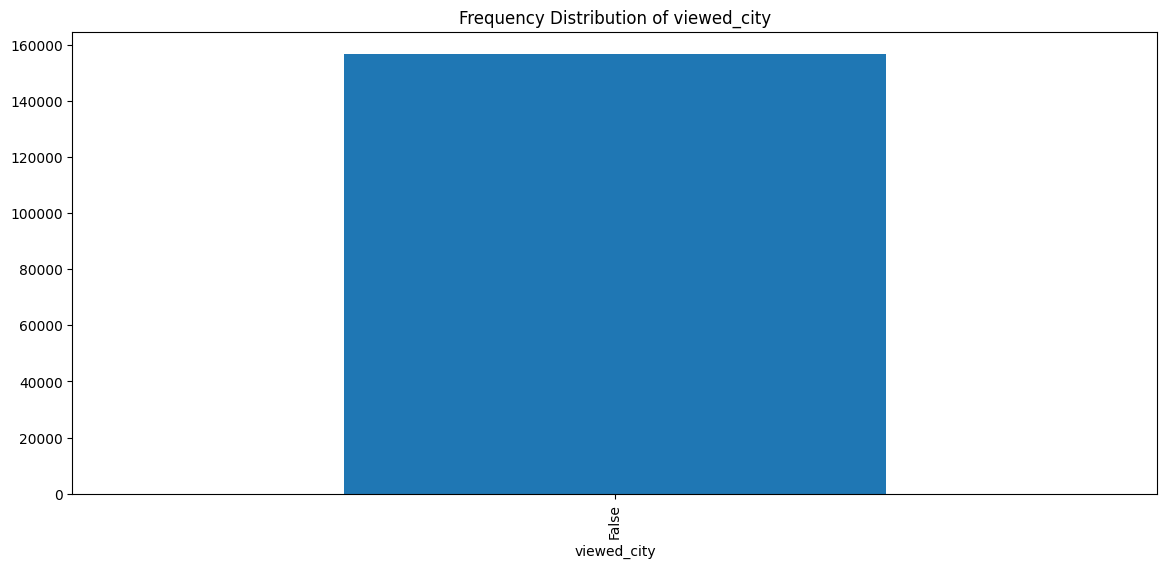

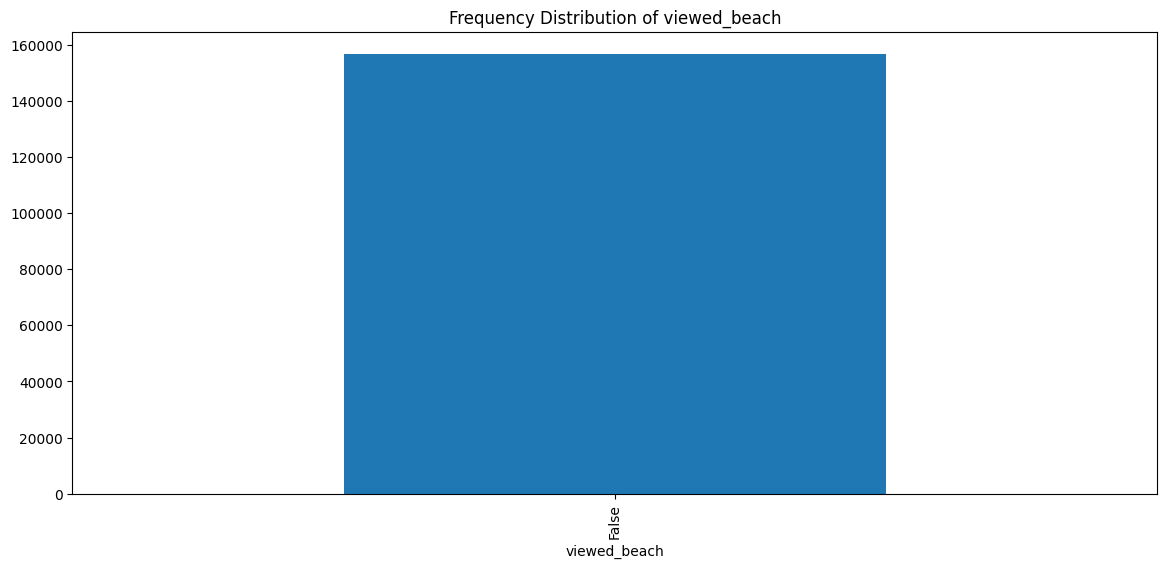

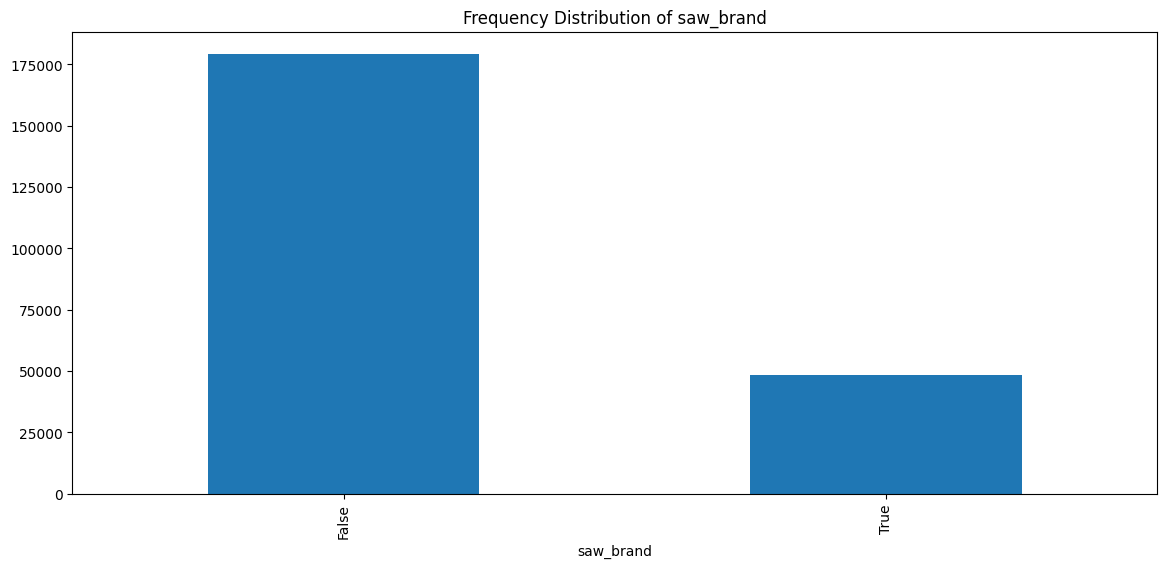

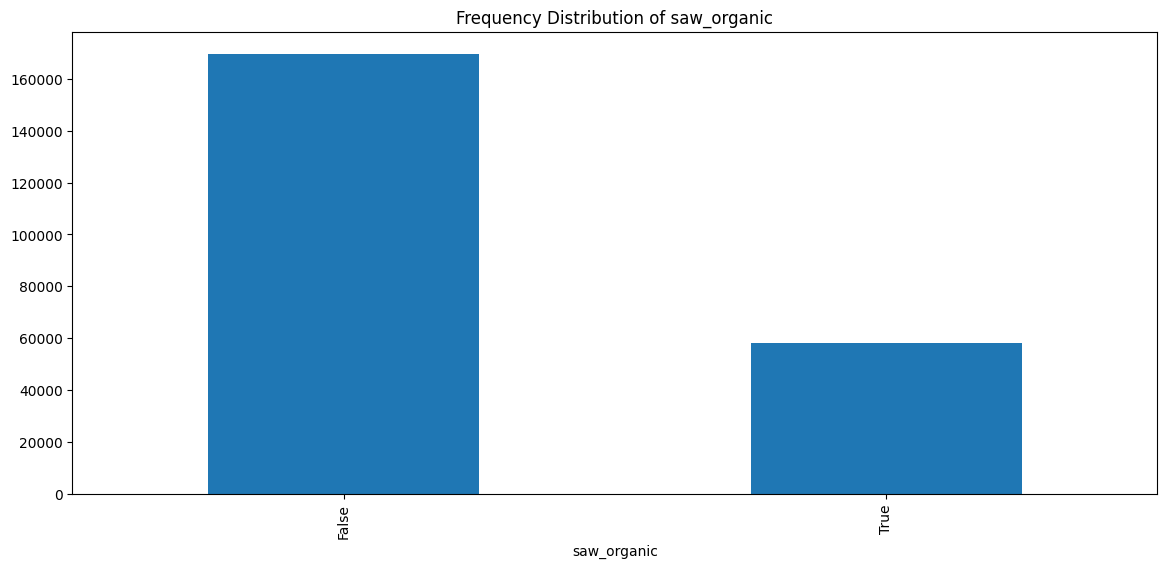

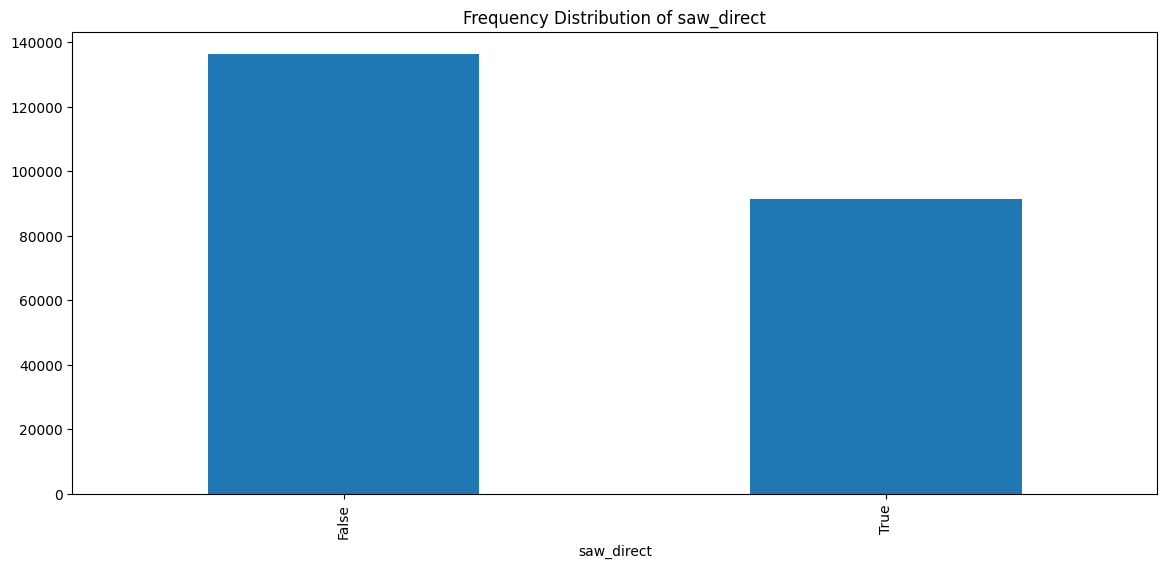

In [18]:
for col in grouped_data.select_dtypes(include=[object]):
    plt.figure(figsize=(14, 6))
    grouped_data[col].value_counts().plot(kind="bar")
    plt.xticks(rotation=90)  # Set x-axis labels to vertical
    plt.title(f"Frequency Distribution of {col}")
    plt.show()

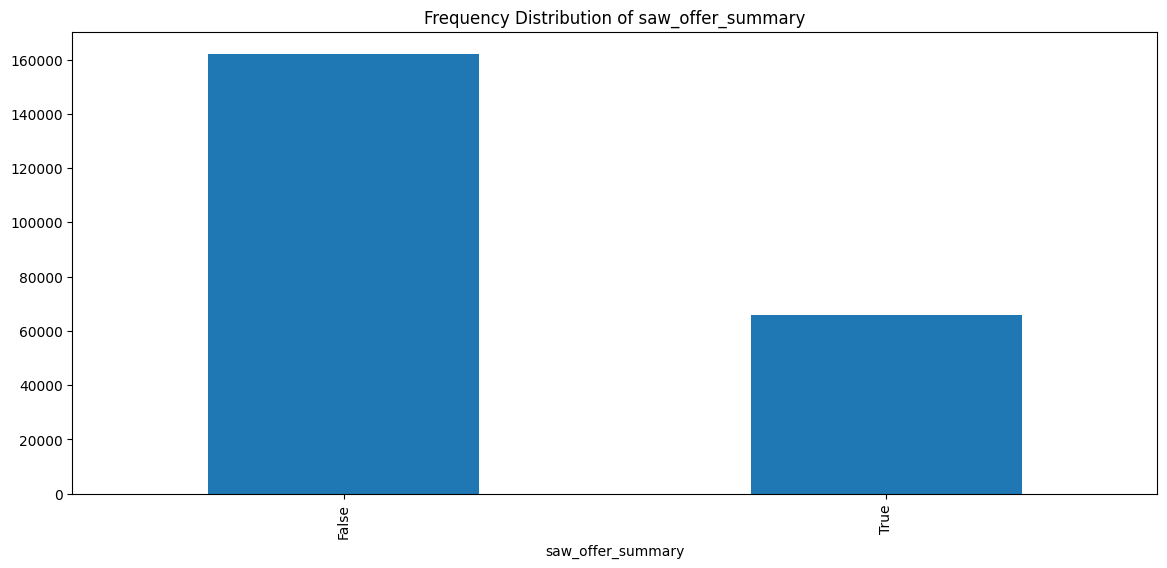

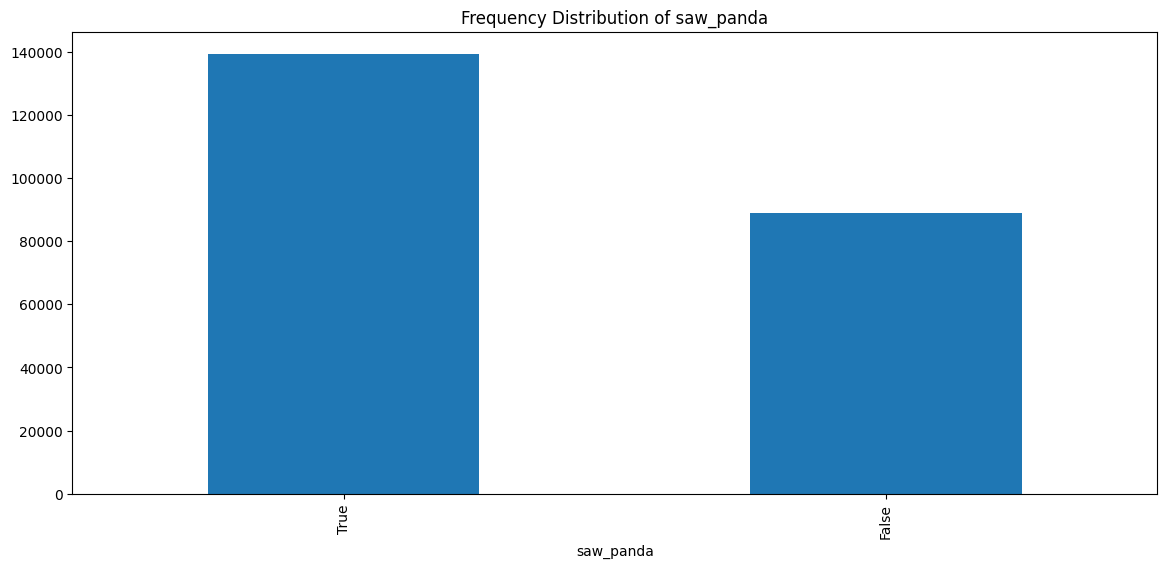

In [19]:
for col in grouped_data.select_dtypes(include=[bool]):
    plt.figure(figsize=(14, 6))
    grouped_data[col].value_counts().plot(kind="bar")
    plt.xticks(rotation=90)  # Set x-axis labels to vertical
    plt.title(f"Frequency Distribution of {col}")
    plt.show()

#### Correlation Analysis before preprocessing the data

Creating a heatmap to find correlations among data


<Axes: >

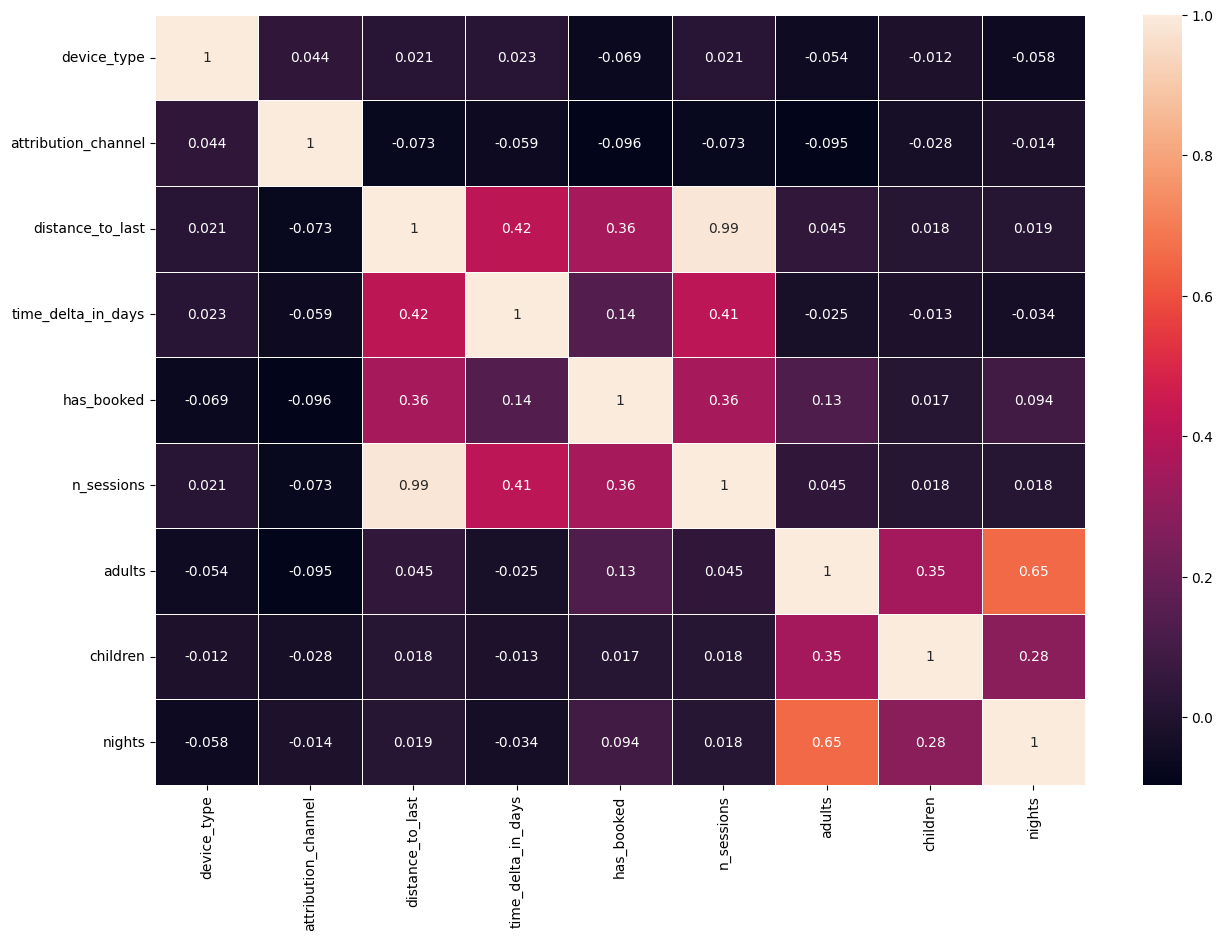

In [20]:
numeric_columns: DataFrame = grouped_data.select_dtypes(include=[np.number])
correlation_matrix: DataFrame = numeric_columns.corr()
# Creating a heatmap to find correlations among data
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

### Preprocess Data

Preprocess data by cleaning, transforming categorical features to numerical values and imputing NA values.

#### Note:

    - The function modifies the input DataFrame in place and return processed DataFrame.
    - If save_path is provided, the preprocessed data will be saved as a Feather file.


In [22]:
from src.main.preprocess_data import preprocess_data

processed_df: DataFrame = preprocess_data(grouped_data)

---------- Preprocessing data -----------
Dropping unnecessary features: ['clicked_city', 'viewed_city', 'viewed_beach']


#### Correlation Analysis after preprocessing the data

Creating a heatmap to find correlations among data


<Axes: >

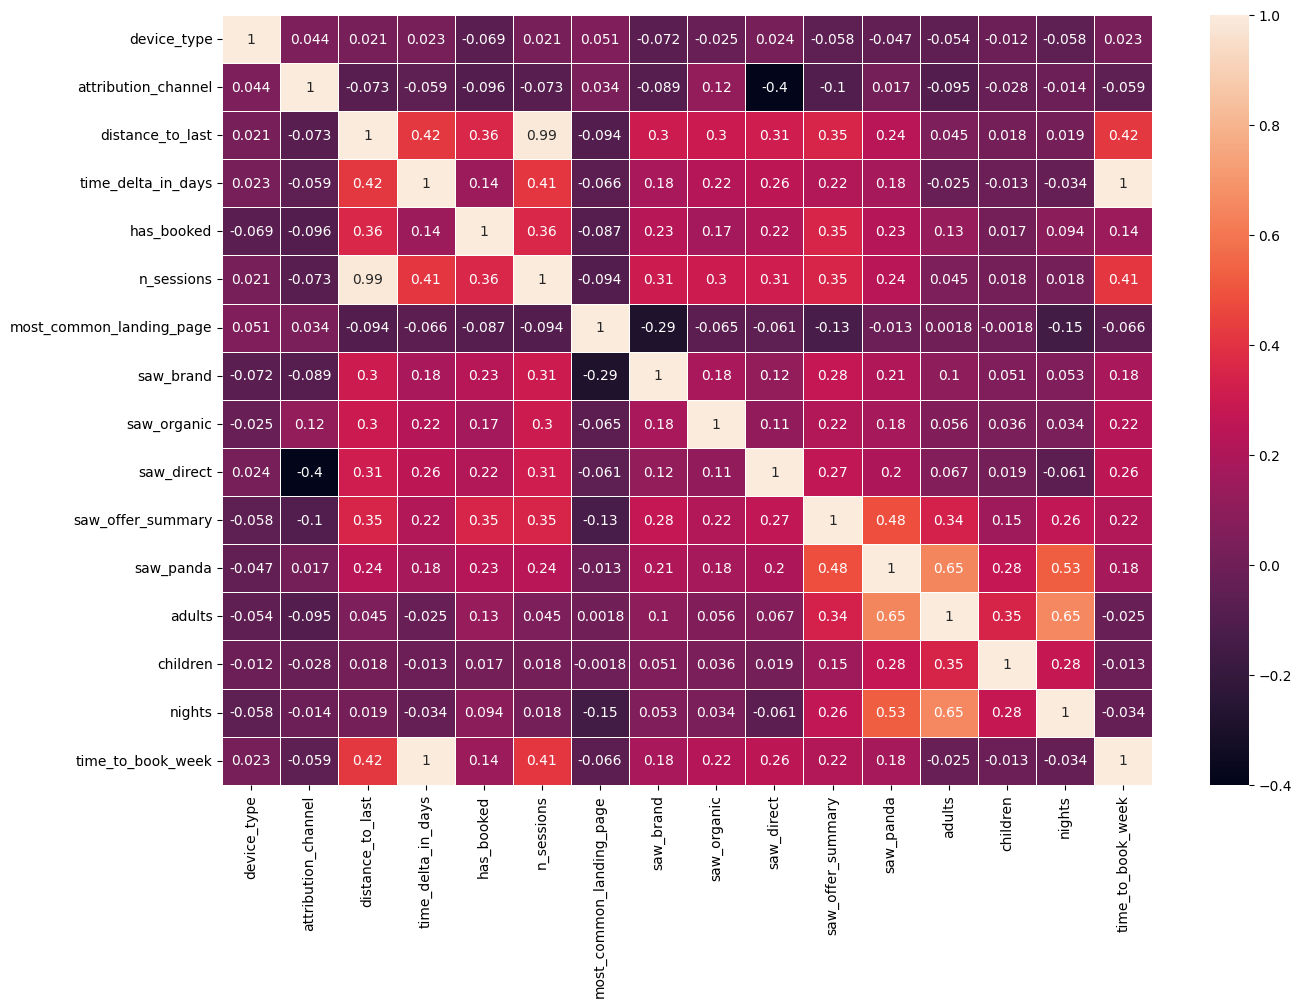

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(processed_df.corr(), annot=True, linewidths=0.5)

# Conclusion

- Based on the EDA findings, the n_sessions feature indicates that users with more sessions are more likely to book. This suggests that engaging with the website or app multiple times increases the likelihood of making a booking. This could be due to increased familiarity with the platform, exposure to promotional offers, or a stronger intent to book.

- The frequency distribution of `device_type` shows that device types 3 is the most common, followed by device type 2 and 5.

-       "clicked_city",
        "viewed_city",
        "viewed_beach"

  Those 3 features have only 1 variable False and other is None so those features will not bring value to model, so we can drop them.

- The feature `distance_to_last` and `n_sessions` are almost identical, we can drop 1.

- The EDA also tells that larger group of users are more likely to book for longer time.

- The EDA shed light on the relationship between booking behavior and factors like number of people, number of sessions, and booking duration. This understanding can help predict booking patterns and optimize marketing efforts accordingly.
